In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
#importing the ILPD data
liverdata = pd.read_csv('liver_patient_data.csv')

In [3]:
datatype=liverdata.dtypes.index
datatype

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [4]:
liverdata.shape
liverdata

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
5,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1
6,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,1
7,29,Female,0.9,0.3,202,14,11,6.7,3.6,1.10,1
8,17,Male,0.9,0.3,202,22,19,7.4,4.1,1.20,2
9,55,Male,0.7,0.2,290,53,58,6.8,3.4,1.00,1


In [5]:
liverdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
Age                           583 non-null int64
Gender                        583 non-null object
Total_Bilirubin               583 non-null float64
Direct_Bilirubin              583 non-null float64
Alkaline_Phosphotase          583 non-null int64
Alamine_Aminotransferase      583 non-null int64
Aspartate_Aminotransferase    583 non-null int64
Total_Protiens                583 non-null float64
Albumin                       583 non-null float64
Albumin_and_Globulin_Ratio    579 non-null float64
Dataset                       583 non-null int64
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [6]:
liverdata.isnull().values.any()

True

In [7]:
liverdata.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [8]:
#albumin_and_globulin_ratio has null values
liverdata['Albumin_and_Globulin_Ratio'].isnull().sum()

4

In [9]:
liverdata['Albumin_and_Globulin_Ratio'].mean()

0.9470639032815201

In [10]:
liverdata["Albumin_and_Globulin_Ratio"].fillna(liverdata['Albumin_and_Globulin_Ratio'].mean(), inplace = True)

In [11]:
liverdata.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

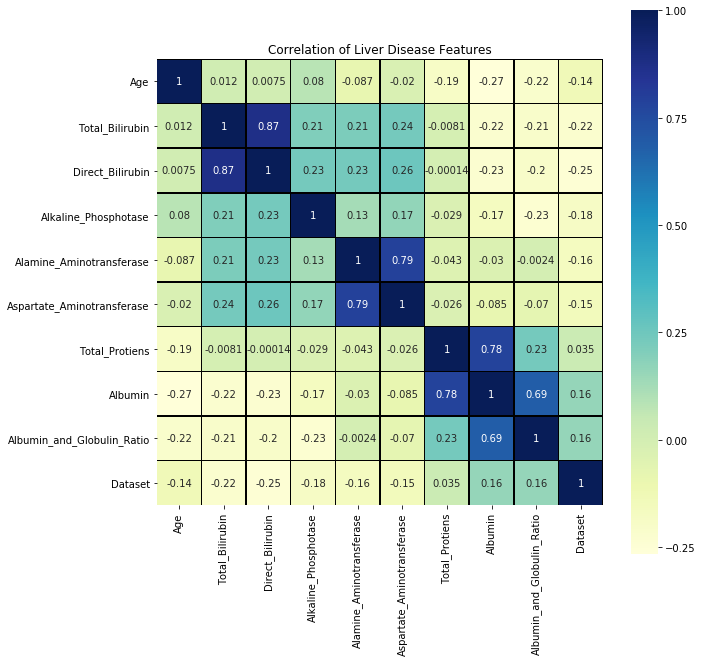

In [12]:
plt.subplots(figsize=(10,10))
sns.heatmap(liverdata.corr(),linewidths=0.5,linecolor='black',vmax=1.0,square=True,cmap="YlGnBu",annot=True)
plt.title('Correlation of Liver Disease Features')
plt.show()

In [13]:
## output value has '1' for liver disease and '2' for no liver disease so making it 0 for no disease

def partition(x):
    if x == 2:
        return 0
    return 1

liverdata['Dataset'] = liverdata['Dataset'].map(partition)


liverdata.head(250)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.900000,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.740000,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.890000,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.000000,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.400000,1
5,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.300000,1
6,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.000000,1
7,29,Female,0.9,0.3,202,14,11,6.7,3.6,1.100000,1
8,17,Male,0.9,0.3,202,22,19,7.4,4.1,1.200000,0
9,55,Male,0.7,0.2,290,53,58,6.8,3.4,1.000000,1


In [14]:
## output value has '1' for liver disease and '2' for no liver disease so making it 0 for no disease 

def partition(x):
    if x =='Male':
        return 0
    return 1

liverdata['Gender'] = liverdata['Gender'].map(partition)


liverdata.head(250)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.900000,1
1,62,0,10.9,5.5,699,64,100,7.5,3.2,0.740000,1
2,62,0,7.3,4.1,490,60,68,7.0,3.3,0.890000,1
3,58,0,1.0,0.4,182,14,20,6.8,3.4,1.000000,1
4,72,0,3.9,2.0,195,27,59,7.3,2.4,0.400000,1
5,46,0,1.8,0.7,208,19,14,7.6,4.4,1.300000,1
6,26,1,0.9,0.2,154,16,12,7.0,3.5,1.000000,1
7,29,1,0.9,0.3,202,14,11,6.7,3.6,1.100000,1
8,17,0,0.9,0.3,202,22,19,7.4,4.1,1.200000,0
9,55,0,0.7,0.2,290,53,58,6.8,3.4,1.000000,1


In [15]:
count_class_0, count_class_1 = liverdata['Dataset'].value_counts()

# Divide by class
data_class0 = liverdata[liverdata['Dataset'] == 0]
data_class1 = liverdata[liverdata['Dataset'] == 1]

liverdata = pd.concat([data_class0,data_class1.head(250)], axis=0)
liverdata

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
8,17,0,0.9,0.3,202,22,19,7.4,4.1,1.20,0
12,64,0,0.9,0.3,310,61,58,7.0,3.4,0.90,0
15,25,0,0.6,0.1,183,91,53,5.5,2.3,0.70,0
17,33,0,1.6,0.5,165,15,23,7.3,3.5,0.92,0
24,63,0,0.9,0.2,194,52,45,6.0,3.9,1.85,0
28,20,0,1.1,0.5,128,20,30,3.9,1.9,0.95,0
29,84,1,0.7,0.2,188,13,21,6.0,3.2,1.10,0
32,57,0,1.0,0.3,187,19,23,5.2,2.9,1.20,0
33,38,1,2.6,1.2,410,59,57,5.6,3.0,0.80,0
34,38,1,2.6,1.2,410,59,57,5.6,3.0,0.80,0


In [16]:
liverdata.shape

(417, 11)

In [17]:
X = liverdata.drop('Dataset',axis=1)
Y = liverdata['Dataset']


In [18]:
X

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
8,17,0,0.9,0.3,202,22,19,7.4,4.1,1.20
12,64,0,0.9,0.3,310,61,58,7.0,3.4,0.90
15,25,0,0.6,0.1,183,91,53,5.5,2.3,0.70
17,33,0,1.6,0.5,165,15,23,7.3,3.5,0.92
24,63,0,0.9,0.2,194,52,45,6.0,3.9,1.85
28,20,0,1.1,0.5,128,20,30,3.9,1.9,0.95
29,84,1,0.7,0.2,188,13,21,6.0,3.2,1.10
32,57,0,1.0,0.3,187,19,23,5.2,2.9,1.20
33,38,1,2.6,1.2,410,59,57,5.6,3.0,0.80
34,38,1,2.6,1.2,410,59,57,5.6,3.0,0.80


Number of patients diagnosed with liver disease:  250
Number of patients not diagnosed with liver disease:  167


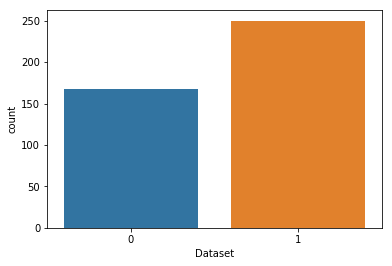

In [19]:
sns.countplot(data=liverdata, x = 'Dataset', label='Count')

LD,NLD = liverdata['Dataset'].value_counts()
print('Number of patients diagnosed with liver disease: ',LD)
print('Number of patients not diagnosed with liver disease: ',NLD)

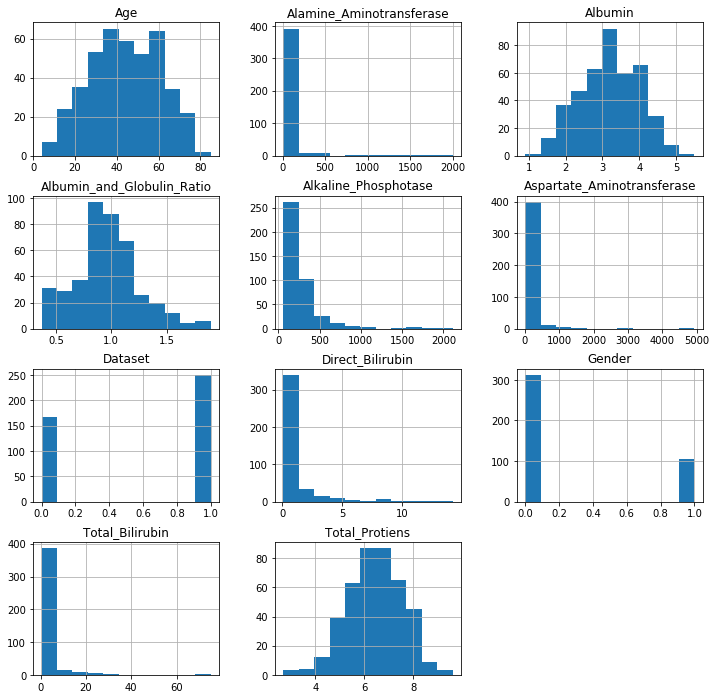

In [20]:
liverdata.hist(bins=11,figsize=(12,12))
plt.show()

In [21]:
# split data

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 99)


#scaling of the data using min-max scaler
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)




#X_train, X_test, Y_train, Y_test = X_train.astype(np.float64), X_test.astype(np.float64), Y_train.astype(np.float64), Y_test.astype(np.float64)

C:\Users\Archan\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [22]:
#Libraries to Build Ensemble Model : Random Forest Classifier 
# Create the parameter grid based on the results of random search 

params_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

#parameters = {'kernel': ['linear'], 'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}

In [23]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV

# Performing CV to tune parameters for best SVM fit 
svm_model = GridSearchCV(SVC(kernel="rbf", probability=True, C=0.1, gamma=0.001), params_grid, cv=5)
svm_model.fit(X_train, Y_train)


#model = SVC(kernel="rbf", probability=True, C=0.1, gamma=0.001, max_iter=10000)
#svm_model = GridSearchCV(model, parameters, n_jobs=-1, cv=3)

svm_model.fit(X_train,Y_train)

C:\Users\Archan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Archan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'kernel': ['rbf'], 'gamma': [0.001, 0.0001], 'C': [1, 10, 100, 1000]}, {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [24]:
Y_predict = svm_model.predict(X_test)
cm = confusion_matrix(Y_test,Y_predict)

In [26]:
cm = np.array(confusion_matrix(Y_test,Y_predict,labels=[1,0]))

confusion=pd.DataFrame(cm, index=['is_Liver_Disease', 'No_Liver_Disease'], columns=['Prediction_of_Disease', 'Prediction_of_Healthy']) 
confusion

,Prediction_of_Disease,Prediction_of_Healthy
is_Liver_Disease,38,40
No_Liver_Disease,8,40


In [27]:
print(classification_report(Y_test,Y_predict))

              precision    recall  f1-score   support

           0       0.50      0.83      0.62        48
           1       0.83      0.49      0.61        78

   micro avg       0.62      0.62      0.62       126
   macro avg       0.66      0.66      0.62       126
weighted avg       0.70      0.62      0.62       126



In [28]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
accuracy = accuracy_score(Y_test,Y_predict)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 61.90%


In [30]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from keras.layers.convolutional import Convolution2D
from keras.utils import to_categorical

# Initialising the ANN
myliverclassifier = Sequential() 
myliverclassifier.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu', input_dim = 10))
#hidden layer
myliverclassifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
myliverclassifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
#output layer
myliverclassifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))



#myliverclassifier.add(Dense(60, input_dim=10, kernel_initializer='normal', activation='relu'))
#myliverclassifier.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))


# compile ANN
myliverclassifier.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the dat
history =myliverclassifier.fit(X_train, Y_train, batch_size = 20, epochs =17 )

Epoch 1/17
291/291 [==============================] - 2s 7ms/step - loss: 0.6922 - acc: 0.5808
Epoch 2/17
291/291 [==============================] - 0s 186us/step - loss: 0.6907 - acc: 0.5911
Epoch 3/17
291/291 [==============================] - 0s 207us/step - loss: 0.6891 - acc: 0.5911
Epoch 4/17
291/291 [==============================] - 0s 192us/step - loss: 0.6875 - acc: 0.5911
Epoch 5/17
291/291 [==============================] - 0s 193us/step - loss: 0.6859 - acc: 0.5911
Epoch 6/17
291/291 [==============================] - 0s 186us/step - loss: 0.6841 - acc: 0.5911
Epoch 7/17
291/291 [==============================] - 0s 217us/step - loss: 0.6820 - acc: 0.5911
Epoch 8/17
291/291 [==============================] - 0s 224us/step - loss: 0.6799 - acc: 0.5911
Epoch 9/17
291/291 [==============================] - 0s 193us/step - loss: 0.6776 - acc: 0.5911
Epoch 10/17
291/291 [==============================] - 0s 189us/step - loss: 0.6752 - acc: 0.5911
Epoch 11/17
291/291 [==========

In [31]:
y_predict = myliverclassifier.predict(X_test)

y_predict = [ 1 if y>=0.5 else 0 for y in y_predict ]

In [32]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
accuracy = accuracy_score(Y_test,Y_predict)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 61.90%


In [33]:
liverdata=pd.read_csv('liver_patient_data.csv')

In [34]:
datatype=liverdata.dtypes.index
datatype

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [35]:
liverdata.shape
liverdata

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
5,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1
6,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,1
7,29,Female,0.9,0.3,202,14,11,6.7,3.6,1.10,1
8,17,Male,0.9,0.3,202,22,19,7.4,4.1,1.20,2
9,55,Male,0.7,0.2,290,53,58,6.8,3.4,1.00,1


In [36]:
liverdata["Albumin_and_Globulin_Ratio"].fillna("0.6", inplace = True)
liverdata['Gender']=liverdata.Gender.map(dict(Female=0,Male=1))
liverdata

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.9,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.4,1
5,46,1,1.8,0.7,208,19,14,7.6,4.4,1.3,1
6,26,0,0.9,0.2,154,16,12,7.0,3.5,1,1
7,29,0,0.9,0.3,202,14,11,6.7,3.6,1.1,1
8,17,1,0.9,0.3,202,22,19,7.4,4.1,1.2,2
9,55,1,0.7,0.2,290,53,58,6.8,3.4,1,1


Number of patients diagnosed with liver disease:  416
Number of patients not diagnosed with liver disease:  167


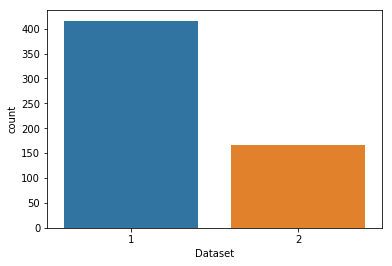

In [37]:
sns.countplot(data=liverdata, x = 'Dataset', label='Count')

LD,NLD = liverdata['Dataset'].value_counts()
print('Number of patients diagnosed with liver disease: ',LD)
print('Number of patients not diagnosed with liver disease: ',NLD)

In [41]:
liverdata_sex = pd.get_dummies(liverdata['Gender'])
liverdata_new = pd.concat([liverdata, liverdata_sex], axis=1)
liverdata_gender = liverdata_new.drop(labels=['Gender' ],axis=1 )
liverdata_gender.columns = ['Age', 'Total_Bilirubin', 'Direct_Bilirubin','Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase','Total_Protiens','Albumin','Albumin_and_Globulin_Ratio','1','0','Dataset']

X = liverdata_gender.drop('Dataset',axis=1)
Y = liverdata_gender['Dataset']


# split data

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 99)


#scaling of the data using min-max scaler
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


C:\Users\Archan\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Archan\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64, object were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Archan\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: DataConversionWarning: Data with input dtype uint8, int64, float64, object were all converted to float64 by StandardScaler.


In [42]:
#Libraries to Build Ensemble Model : Random Forest Classifier 
# Create the parameter grid based on the results of random search 

params_grid = [{'kernel': ['linear'], 'C': [1, 10, 100, 1000]},
               {'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]


In [43]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV

# Performing CV to tune parameters for best SVM fit 
svm_model = GridSearchCV(SVC(kernel="rbf", probability=True, C=0.1, gamma=0.001), params_grid, cv=5)
svm_model.fit(X_train, Y_train)


#model = SVC(kernel="rbf", probability=True, C=0.1, gamma=0.001, max_iter=10000)
#svm_model = GridSearchCV(model, parameters, n_jobs=-1, cv=3)

svm_model.fit(X_train,Y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'kernel': ['linear'], 'C': [1, 10, 100, 1000]}, {'kernel': ['rbf'], 'gamma': [0.001, 0.0001], 'C': [1, 10, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [44]:
Y_predict = svm_model.predict(X_test)
cm = confusion_matrix(Y_test,Y_predict)

In [45]:
cm = np.array(confusion_matrix(Y_test,Y_predict,labels=[1,0]))

confusion=pd.DataFrame(cm, index=['is_Liver_Disease', 'No_Liver_Disease'], columns=['Prediction_of_Disease', 'Prediction_of_Healthy']) 
confusion

,Prediction_of_Disease,Prediction_of_Healthy
is_Liver_Disease,132,0
No_Liver_Disease,0,43


In [46]:
print(classification_report(Y_test,Y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00       132

   micro avg       1.00      1.00      1.00       175
   macro avg       1.00      1.00      1.00       175
weighted avg       1.00      1.00      1.00       175



In [47]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
accuracy = accuracy_score(Y_test,Y_predict)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 100.00%


In [50]:
myliverclassifier = Sequential() # Initialising the ANN
#input layer
myliverclassifier.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
#hidden layer
myliverclassifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
myliverclassifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
#output layer
myliverclassifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# compile ANN
myliverclassifier.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the dat
history =myliverclassifier.fit(X_train, Y_train, batch_size = 20, epochs = 17)

Epoch 1/17
408/408 [==============================] - 3s 7ms/step - loss: 0.6880 - acc: 0.7475
Epoch 2/17
408/408 [==============================] - 0s 214us/step - loss: 0.6773 - acc: 0.7574
Epoch 3/17
408/408 [==============================] - 0s 228us/step - loss: 0.6592 - acc: 0.7574
Epoch 4/17
408/408 [==============================] - 0s 199us/step - loss: 0.6286 - acc: 0.7574
Epoch 5/17
408/408 [==============================] - 0s 199us/step - loss: 0.5825 - acc: 0.7574
Epoch 6/17
408/408 [==============================] - 0s 184us/step - loss: 0.5235 - acc: 0.7574
Epoch 7/17
408/408 [==============================] - 0s 209us/step - loss: 0.4561 - acc: 0.7574
Epoch 8/17
408/408 [==============================] - 0s 216us/step - loss: 0.3896 - acc: 0.7574
Epoch 9/17
408/408 [==============================] - 0s 243us/step - loss: 0.3315 - acc: 0.7574
Epoch 10/17
408/408 [==============================] - 0s 238us/step - loss: 0.2831 - acc: 0.7574
Epoch 11/17
408/408 [==========

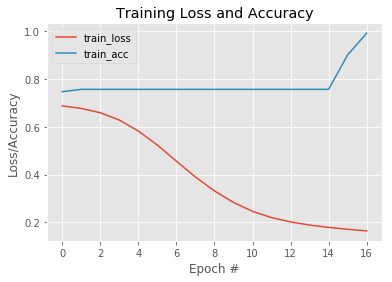

In [54]:
plt.style.use("ggplot")
plt.figure()
N = 17
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["acc"], label="train_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper left")

In [55]:
y_predict = myliverclassifier.predict(X_test)
y_predict = [ 1 if y>=0.5 else 0 for y in y_predict ]

In [57]:
print(classification_report(Y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.99      1.00      1.00       132

   micro avg       0.99      0.99      0.99       175
   macro avg       1.00      0.99      0.99       175
weighted avg       0.99      0.99      0.99       175



In [59]:
github

Accuracy: 99.43%
